# Exploratory Data Analysis: Airbnb Listings - Edinburgh 

This project involves performing an exploratory data analysis (EDA) on Airbnb listings data for a particular city. The analysis will focus on factors such as price, availability, location, and property type to identify trends and patterns in the demand for Airbnb listings in the city. The project will include data cleaning, visualization, and statistical analysis using tools such as Python and Jupyter Notebook.

## Importing libraries, loading dataset and simple exploration

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import plotly.express as px
import os as os
import sys as sys
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
#import ydata_profiling as pp
#from ydata_profiling import ProfileReport   ##create a profile report for listings.csv

In [57]:
df = pd.read_csv('listings_summary.csv')
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,15420,Rental unit in Edinburgh · ★4.98 · 1 bedroom ·...,60423,Charlotte,NaN,"Old Town, Princes Street and Leith Street",55.957590,-3.188050,Entire home/apt,126,3,492,2023-06-11,3.26,1,39,81,NaN
1,24288,Loft in Edinburgh · ★4.62 · 2 bedrooms · 2 bed...,46498,Gordon,NaN,"Canongate, Southside and Dumbiedykes",55.944983,-3.185293,Entire home/apt,95,3,274,2023-05-29,1.77,1,46,46,NaN


In [58]:
df.shape

(7698, 18)

In [59]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [159]:
#df['neighbourhood'].unique()

In [160]:
#df['room_type'].unique()

## Data Cleaning

In [63]:
df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            2
neighbourhood_group               7698
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        829
reviews_per_month                  829
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           7672
dtype: int64

In [64]:
df.drop(['id','host_name','last_review', 'license', 'neighbourhood_group'],axis=1,inplace=True)
df.sample()

,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1783,Home in Edinburgh · ★4.75 · 3 bedrooms · 3 bed...,20923270,The Grange,55.93565,-3.17784,Entire home/apt,491,1,20,0.34,14,47,6


In [65]:
df['reviews_per_month'].fillna(0,inplace=True)

In [69]:
df.sample()

,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
7211,Rental unit in Edinburgh · ★5.0 · 1 bedroom · ...,191891016,Dalry and Fountainbridge,55.941495,-3.213148,Entire home/apt,99,2,5,3.19,11,38,5


## TRENDS

### What are the most frequent prices?

In [168]:
df['price'].value_counts().head(10)
most_frequent = df['price'].value_counts().head(10)
print('Most frequent:')
most_frequent

Most frequent:


price
100    192
150    165
120    128
50     123
200    116
60     115
75     106
80     106
70      96
250     94
Name: count, dtype: int64

### Are the most frequent prices closer to the cheapest or most expensive rooms?

In [163]:
#most expensive
sorteddf = df.sort_values(by='price', ascending=False)
top = sorteddf['price'].unique()
most_expensive = []
for i in range(10):
    most_expensive.append(top[i])  ##highest 10 unique prices
print('Most expensive:\n')
print(most_expensive)
print('\n')
#least expensive
sorteddf2 = df.sort_values(by='price', ascending=True)
bottom = sorteddf2['price'].unique()
least_expensive = []
for i in range(10):
    least_expensive.append(bottom[i])  ##lowest 10 unique prices
    
print('Least expensive:\n')
print(least_expensive)

Most expensive:

[20551, 19591, 10000, 9391, 8597, 7161, 6200, 6000, 5000, 4884]


Least expensive:

[0, 9, 10, 11, 12, 14, 15, 17, 18, 19]


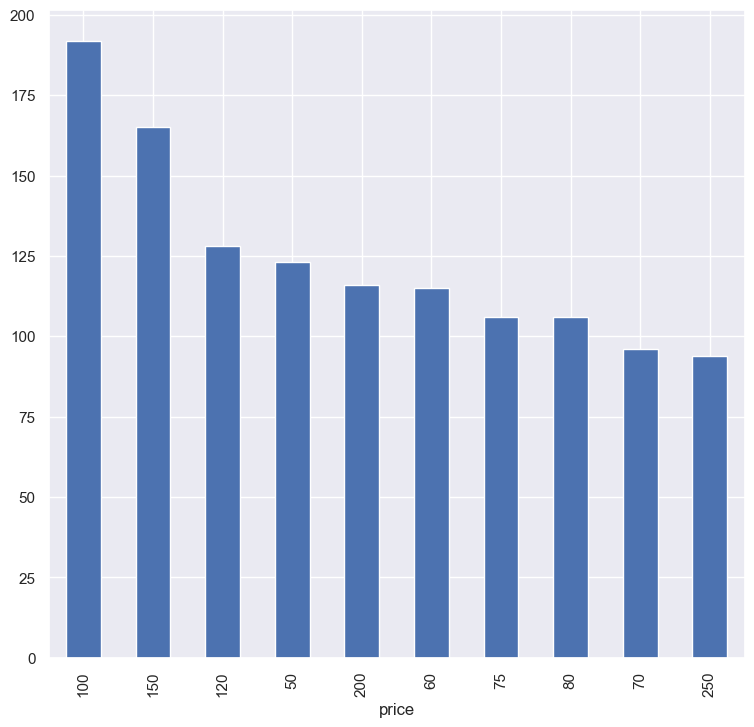

In [191]:
sns.set(rc={'figure.figsize':(8,8)})
price_bar = most_frequent.plot(kind='bar')

In [202]:
price_x = []
price_y = []
for i in range(10):
    #print('price:',most_expensive[i],' number:', sorteddf[sorteddf['price'] == most_expensive[i]].count().values[0])
    price_x.append(least_expensive[i])
    price_y.append(sorteddf[sorteddf['price'] == least_expensive[i]].count().values[0])

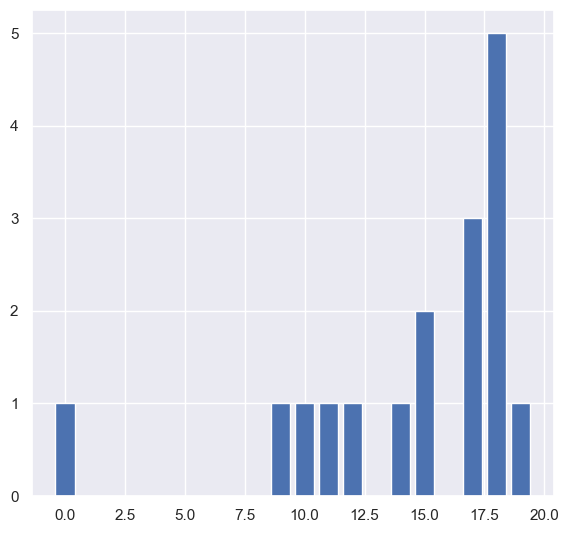

In [206]:
plt.figure(figsize=(6,6))
plt.bar(price_x, price_y)
plt.show()

#### Conclusion: most and least expensive rooms look like they are anomallies, they are too far from the most frequent both in value and frequency

### What are the prices by availability? Are they close to frequent prices?

In [221]:
most_avail = df['availability_365'].value_counts().head(10)
most_avail

availability_365
0      1395
5        72
365      71
16       68
21       67
11       66
3        66
24       65
9        65
1        63
Name: count, dtype: int64

In [241]:
lowest = sorteddf.groupby('availability_365')['price'].min()
lowest.head(10)  ##minimum price by availability

availability_365
0     0
1    23
2    18
3    30
4    17
5    29
6    48
7    39
8    33
9    34
Name: price, dtype: int64

### Where are they available?

### And what property types exist with most frequent prices? 

### What property types are available across the country?

### What rooms are available across the country?

### What are the most frequent locations?

#### This helps decision makers learn about:
#### 1) The occurrence of prices
#### 2) How to price newly introduced rooms
#### 3) How to make newly priced rooms and property types more available
#### 4) They should also learn about the average prices of property types and rooms in different locations
#### 5) This is also helpful to understand analytics better and how to offer better deals to potential cutomers
#### 6) How to save company resources and costs by knowing which locations and prices to make more available 